# Tutorial 1B Hands on data - wrangling data with Python & pandas


In two parts:
* reproducing the DataWrangler process (using the same 'Air crashes' data) and 
* bad, bad data investigations


** Before you start, a most important thing to do, check your python version**

In [1]:
import sys
print (sys.version_info)

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)


In [2]:
import pandas as pd # not the bamboo eating bear... 'Panel Data' 

# Part 1 
## Step 1 Read data 

In [3]:
# load data
df = pd.read_csv('AirCrashes.csv') # df is a dataframe, confirm with: type(df)
df.shape

(927, 1)

#### How many lines of data?
#### How many did you get with DataWrangler?

Have a look a the first few rows:

In [4]:
# df[0:2] #or
df.head(6)

,Incident American Airlines Flight 11 involving a Boeing 767-223ER in 2001
Casualties,Extremely High
Total Dead,1692
Crew,11
Passengers,81
Ground,1600
Notes,No survivors


That's not quite right.. the first line has been stolen for the title/header
#### Does read_csv ignore empty lines? 
e.g. line 18 should be blank

skip_blank_lines = True (the default) see:

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Try again, force our own headers upon the data using default column names from DataWrangler (split/extract etc.) 

This pushes the first incident down into the data where it belongs (but adds a NaN, below)

In [5]:
df = pd.read_csv('AirCrashes.csv', names = ['split', 'split1']) 
# column names (split, split1) replicate DataWrangler column names
df.head(6)

,split,split1
0,Incident American Airlines Flight 11 involving...,NaN
1,Casualties,Extremely High
2,Total Dead,1692
3,Crew,11
4,Passengers,81
5,Ground,1600


## Step 2 Extract index(s)

### Extract flight information


In [6]:
# now extract flights based on one of the suggestions from DataWrangler 
df['split'].str.extract("Incident(.*)involving") # 移除 "Incident(.*)involving"
# treat the 'split' column as a str, then 
# use the extract method on the str

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


0        American Airlines Flight 11 
1                                 NaN
2                                 NaN
3                                 NaN
4                                 NaN
5                                 NaN
6                                 NaN
7                                 NaN
8                                 NaN
9                                 NaN
10                                NaN
11                                NaN
12                                NaN
13                                NaN
14                                NaN
15                                NaN
16        United Airlines Flight 175 
17                                NaN
18                                NaN
19                                NaN
20                                NaN
21                                NaN
22                                NaN
23                                NaN
24                                NaN
25                                NaN
26          

In [ ]:
# df['split'].str.extract("(d$)") # 移除字尾是d的

### That seems to have worked...

We got 'American Airlines Flight 11' and 'United Airlines Flight 175' etc but lost all the other data and gained a bunch of NaNs

#### What is this 'str.extract' code anyway? (add a comment to decode or explain it)

extract("Incident (.*) involving")

### But we want planes in a new column, we can create one called 'extract' like this:

df['extract'] = df['split'].str.extract("Incident (.*) involving")

But this would be the last column, we want it in the second (location is not critical but it can be done so why not). 

Try this:

In [7]:
df.insert(1, 'extract', df['split'].str.extract("Incident (.*) involving",expand= True))
# have a go at commenting this line of code too

In [8]:
df.head(5)

,split,extract,split1
0,Incident American Airlines Flight 11 involving...,American Airlines Flight 11,NaN
1,Casualties,NaN,Extremely High
2,Total Dead,NaN,1692
3,Crew,NaN,11
4,Passengers,NaN,81


In [13]:
# change the column names
# df.columns = ['split1', 'extract1', 'split2']
# df.head(5)

In [ ]:
# df.insert(2, 'extract2', df['split1'].str.extract("(d$)",expand= True) # 顯示字尾為d的
# df.head(5)

So there's the flight information in it's own column, plus a whole lot of NaNs

We could replace all the NaN with spaces or similar but they can wait

Now we want the aircraft in it's own column, similar to above, 
based on the suggestion from DataWrangler, note spaces in "\ a (.*)\ in "

#### but is this optimal?  

In [9]:
# and repeat to get the aircraft type 
df.insert(1, 'extract0', df['split'].str.extract(" a (.*) in ",expand= True)) # 抓出 a 到 in之間的值，放在extract0

In [10]:
df.head(10)

,split,extract0,extract,split1
0,Incident American Airlines Flight 11 involving...,Boeing 767-223ER,American Airlines Flight 11,NaN
1,Casualties,NaN,NaN,Extremely High
2,Total Dead,NaN,NaN,1692
3,Crew,NaN,NaN,11
4,Passengers,NaN,NaN,81
5,Ground,NaN,NaN,1600
6,Notes,NaN,NaN,No survivors
7,Type,NaN,NaN,INH
8,Reason,NaN,NaN,Attack
9,Location,NaN,NaN,New York - New York - US


Drop the empty lines 

In [11]:
df = df.dropna(how='all') 
df

,split,extract0,extract,split1
0,Incident American Airlines Flight 11 involving...,Boeing 767-223ER,American Airlines Flight 11,NaN
1,Casualties,NaN,NaN,Extremely High
2,Total Dead,NaN,NaN,1692
3,Crew,NaN,NaN,11
4,Passengers,NaN,NaN,81
5,Ground,NaN,NaN,1600
6,Notes,NaN,NaN,No survivors
7,Type,NaN,NaN,INH
8,Reason,NaN,NaN,Attack
9,Location,NaN,NaN,New York - New York - US


## Step 3  'Fill down'

We want to 'fill down' the indexes  (e.g. lines 1 to 15 should be associated with line 0)

There are several options
* na.locf() method from zoo package. 
* ddply() from plyr
* bfill()
* fillna()


In [12]:
df = df.fillna(method = 'pad') # magic, take the previous value (not NaN) and fill down

# http://pandas.pydata.org/pandas-docs/stable/missing_data.html#filling-missing-values-fillna

In [13]:
df.head(200)

,split,extract0,extract,split1
0,Incident American Airlines Flight 11 involving...,Boeing 767-223ER,American Airlines Flight 11,NaN
1,Casualties,Boeing 767-223ER,American Airlines Flight 11,Extremely High
2,Total Dead,Boeing 767-223ER,American Airlines Flight 11,1692
3,Crew,Boeing 767-223ER,American Airlines Flight 11,11
4,Passengers,Boeing 767-223ER,American Airlines Flight 11,81
5,Ground,Boeing 767-223ER,American Airlines Flight 11,1600
6,Notes,Boeing 767-223ER,American Airlines Flight 11,No survivors
7,Type,Boeing 767-223ER,American Airlines Flight 11,INH
8,Reason,Boeing 767-223ER,American Airlines Flight 11,Attack
9,Location,Boeing 767-223ER,American Airlines Flight 11,New York - New York - US


## Step 4 Remove the index row

We need to delete all the 'incident' rows, they have served their purpose and are now redundant. 

In [14]:
# use str.contain function to get the row index.
# keep everything that doesn't have "Incident" in it 
df = df[df['split'].str.contains("Incident") == False] # 含有Incident都移除
# do we need to worry about a plane called "Incident" or "Incident weather" etc???

In [15]:
# and check with e.g. df.shape 
print (df.shape)
df

(870, 4)


,split,extract0,extract,split1
1,Casualties,Boeing 767-223ER,American Airlines Flight 11,Extremely High
2,Total Dead,Boeing 767-223ER,American Airlines Flight 11,1692
3,Crew,Boeing 767-223ER,American Airlines Flight 11,11
4,Passengers,Boeing 767-223ER,American Airlines Flight 11,81
5,Ground,Boeing 767-223ER,American Airlines Flight 11,1600
6,Notes,Boeing 767-223ER,American Airlines Flight 11,No survivors
7,Type,Boeing 767-223ER,American Airlines Flight 11,INH
8,Reason,Boeing 767-223ER,American Airlines Flight 11,Attack
9,Location,Boeing 767-223ER,American Airlines Flight 11,New York - New York - US
10,Country,Boeing 767-223ER,American Airlines Flight 11,US


In [44]:
# df = df[df['split1'].str.contains("Crew") == False] # 含有Crew都移除
# print (df.shape)

In [ ]:
# df[0:20]

## Now to 'unfold', there are several options

* melt()
* stack, unstack?
* pivot_table()
* pivot()

http://pandas.pydata.org/pandas-docs/stable/reshaping.html

In [16]:
data = df.pivot('extract', 'split', 'split1') 
# the parameters above are (left to right) index, columns, values 
# You can also write it like this:
#data = df.pivot(index = 'extract', columns = 'split', values = 'split1') 

In [17]:
data.shape 

(58, 15)

In [18]:
data.head() # 58 records, good, but lost plane type, bad
# where's 'extract1' - can we have multiple indexes or have to put that data back in?

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,,,,,,,,,,,,,,,
Aeroflot Flight 217,Extremely High,Bad Visibility by Day,Russia,10,1972-10-13,0,55.755826,Moscow - Russia,37.6173,No survivors,164,APR,Accident,174,COM
Aeroflot Flight 3352,Extremely High,Bad Visibility by Night,Russia,5,1984-10-11,4,54.9666667,Omsk - Russia,73.3833333,Some survivors,169,LDG,Accident,178,COM
Aeroflot Flight 4227,Extremely High,Bad Visibility by Night,Kazakhstan,10,1890-07-08,0,43.255058,Almaty - Kazakhstan,76.912628,No survivors,156,ENR,Accident,166,COM
Aeroflot Flight 7425,Extremely High,Bad Visibility by Night,Uzbekistan,9,1985-07-10,0,42.1566667,Uchkuduk - Uzbekistan,63.5555556,No survivors,191,ENR,Accident,0,COM
Aeroflot/Moldovia (CCCP-65816),Extremely High,Bad Visibility by Night,Kazakhstan,13,1979-08-11,0,48.8125,Saykyn - Kazakhstan,46.7636111,No survivors,165,ENR,Accident,178,COM


### Problem:

we have two columns we want to pivot on, 'extract' & 'extract1' (AKA flight & plane) but

pivot() can't have multiple indexes...

e.g. df.pivot(index = ['extract','extract1'], 'split', 'split1') # error

pivot_table() can but insists on doing some accounting or aggreagating too, like sum or avg, which we don't need

e.g. pd.pivot_table(df, values='split1', index = ['extract','extract1'], columns='split') # error, no function 

### Solutions? 

use pivot() then force the other column back into the data?? 

or trick pivot_table() into doing some pointless accounting (that adds up to nothing)??

try something else... stack, unstack, group, dplyr?

DIY code??



![](http://www.desktopimages.org/pictures/2014/0212/1/orig_150933.jpg)

In [19]:
# pivot()不能用兩個index，pivot_table()才能用多個index
# solution: make the function a copy, x = x
# data = pd.pivot_table(df, index=["extract","extract1"], columns = 'split', values = 'split1', aggfunc = lambda x: x)   
# or 
data = pd.pivot_table(df, index=["extract0","extract"], columns = 'split', values = 'split1', aggfunc = 'max') 
# ha, cop that
# http://stackoverflow.com/questions/19279229/pandas-pivot-table-with-non-numeric-values-dataerror-no-numeric-types-to-ag

data # not using df anymore, keep it as backup

,split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract0,extract,,,,,,,,,,,,,,,
Airbus A300-622R,China Airlines Flight 676,Extremely High,Bad Visibility by Night,China,14,1998-02-16,7,25.0492632,Dayuan - Taiwan - China,121.193945,No survivors,182,APR,Accident,202,COM
Airbus A300B2-203,Iran Air Flight 655,Extremely High,Bad Visibility by Night,Iran,16,1988-07-03,0,26.5944754,Strait of Hormuz - Iran,56.4719928,No survivors,274,ENR,Attack,290,EXG
Airbus A300B4-200,Pakistan International Airlines Flight 268,Extremely High,Bad Visibility by Night,Nepal,12,1992-09-28,0,27.7,Kathmandu - Nepal,85.3333333,No survivors,155,APR,Accident,167,COM
Airbus A300B4-220,Garuda Indonesia Flight 152,Extremely High,Bad Visibility by Night,Indonesia,12,1997-09-26,0,3.585242,Medan - Indonesia,98.6755979,No survivors,222,APR,Accident,234,COM
Airbus A300B4-605R,American Airlines Flight 587,Extremely High,Bad Visibility by Night,US,9,2001-11-12,5,40.5759385,Belle Harbor - New York - US,-73.8481906,No survivors,251,ENR,Accident,265,COM
Airbus A300B4-622R,China Airlines Flight 140,Extremely High,Bad Visibility by Night,Japan,15,1994-04-26,0,35.2903104,Komaki - Japan,136.9109515,Some survivors,249,APR,Accident,264,COM
Airbus A310-304,Kenya Airways Flight 431,Extremely High,Bad Visibility by Night,Cote d'Ivoire,10,2000-01-30,0,3.7355442,Gulf of Guinea - Cote d'Ivoire,3.743509,Some survivors,159,ENR,Accident,169,COM
Airbus A320-233,TAM Airlines Flight 3054,Extremely High,Bad Visibility by Night,Brazil,6,2007-07-17,12,-23.5489433,Sao Paulo - Brazil,-46.6388182,No survivors,181,LDG,Accident,199,COM
Airbus A330-203,Air France Flight 447,Extremely High,Bad Visibility by Night,Sao Pedro,12,2009-06-01,0,03.065833,Atlantic Ocean - Sao Pedro,-30.561667,No survivors,216,ENR,Accident,228,COM


### That's most of the wrangling as was done with DataWrangler, there are a few more optional steps:
* want the manufacturer e.g. Beoing?
* remove 'extract' & 'extract1'?
* rename columns ('split') 
* extract year into new column 
* export e.g. df.to_csv(file_name, sep=',')

In [80]:
# data.reset_index()

split1,extract0,extract1,Casualties,Circumstances,Country,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
0,Airbus A300-622R,China Airlines Flight 676,Extremely High,Bad Visibility by Night,China,1998-02-16,7,25.0492632,Dayuan - Taiwan - China,121.193945,No survivors,182,APR,Accident,202,COM
1,Airbus A300B2-203,Iran Air Flight 655,Extremely High,Bad Visibility by Night,Iran,1988-07-03,0,26.5944754,Strait of Hormuz - Iran,56.4719928,No survivors,274,ENR,Attack,290,EXG
2,Airbus A300B4-200,Pakistan International Airlines Flight 268,Extremely High,Bad Visibility by Night,Nepal,1992-09-28,0,27.7,Kathmandu - Nepal,85.3333333,No survivors,155,APR,Accident,167,COM
3,Airbus A300B4-220,Garuda Indonesia Flight 152,Extremely High,Bad Visibility by Night,Indonesia,1997-09-26,0,3.585242,Medan - Indonesia,98.6755979,No survivors,222,APR,Accident,234,COM
4,Airbus A300B4-605R,American Airlines Flight 587,Extremely High,Bad Visibility by Night,US,2001-11-12,5,40.5759385,Belle Harbor - New York - US,-73.8481906,No survivors,251,ENR,Accident,265,COM
5,Airbus A300B4-622R,China Airlines Flight 140,Extremely High,Bad Visibility by Night,Japan,1994-04-26,0,35.2903104,Komaki - Japan,136.9109515,Some survivors,249,APR,Accident,264,COM
6,Airbus A310-304,Kenya Airways Flight 431,Extremely High,Bad Visibility by Night,Cote d'Ivoire,2000-01-30,0,3.7355442,Gulf of Guinea - Cote d'Ivoire,3.743509,Some survivors,159,ENR,Accident,169,COM
7,Airbus A320-233,TAM Airlines Flight 3054,Extremely High,Bad Visibility by Night,Brazil,2007-07-17,12,-23.5489433,Sao Paulo - Brazil,-46.6388182,No survivors,181,LDG,Accident,199,COM
8,Airbus A330-203,Air France Flight 447,Extremely High,Bad Visibility by Night,Sao Pedro,2009-06-01,0,03.065833,Atlantic Ocean - Sao Pedro,-30.561667,No survivors,216,ENR,Accident,228,COM
9,Antonov An-32B,African Air (RA-26222),Extremely High,Bad Visibility by Night,DR Congo,1996-01-08,237,-4.3316667,Kinshasa - DR Congo,15.3138889,Some survivors,0,ICL,Accident,37,COM


In [20]:
# want the manufacturer e.g. Beoing?
df = df[df['extract0'].str.contains('Beoing') == True]

In [21]:
print(data.shape)

(58, 15)


In [22]:
df

,split,extract0,extract,split1
49,Casualties,Beoing 747SR-46,Japan Airlines Flight 123,Extremely High
50,Total Dead,Beoing 747SR-46,Japan Airlines Flight 123,520
51,Crew,Beoing 747SR-46,Japan Airlines Flight 123,15
52,Passengers,Beoing 747SR-46,Japan Airlines Flight 123,505
53,Ground,Beoing 747SR-46,Japan Airlines Flight 123,0
54,Notes,Beoing 747SR-46,Japan Airlines Flight 123,Some survivors
55,Type,Beoing 747SR-46,Japan Airlines Flight 123,COM
56,Reason,Beoing 747SR-46,Japan Airlines Flight 123,Accident
57,Location,Beoing 747SR-46,Japan Airlines Flight 123,Ueno - Japan
58,Country,Beoing 747SR-46,Japan Airlines Flight 123,Japan


In [23]:
# remove 'extract' & 'extract1'?
del df['extract0']
del df['extract']

In [24]:
df

,split,split1
49,Casualties,Extremely High
50,Total Dead,520
51,Crew,15
52,Passengers,505
53,Ground,0
54,Notes,Some survivors
55,Type,COM
56,Reason,Accident
57,Location,Ueno - Japan
58,Country,Japan


In [25]:
# rename columns ('split')
df.columns = ['new_split', 'split1']

In [26]:
df

,new_split,split1
49,Casualties,Extremely High
50,Total Dead,520
51,Crew,15
52,Passengers,505
53,Ground,0
54,Notes,Some survivors
55,Type,COM
56,Reason,Accident
57,Location,Ueno - Japan
58,Country,Japan


In [32]:
# extract year into new column
df.insert(1, 'new_split1', df['new_split'].str.extract("(e$)",expand= True))

In [33]:
df.head(8)

,new_split,new_split1,split1
49,Casualties,NaN,Extremely High
50,Total Dead,NaN,520
51,Crew,NaN,15
52,Passengers,NaN,505
53,Ground,NaN,0
54,Notes,NaN,Some survivors
55,Type,e,COM
56,Reason,NaN,Accident


In [34]:
# export e.g. df.to_csv(file_name, sep=',') 輸出table到new_split檔案裡
df.to_csv('new_split', sep='\t', encoding='utf-8')

# Part 2 

## Wait there's more:

Bad, bad data

This data has been deliberately damaged (sorry)

Some are obvious, some are subtle (some were already there... e.g. look for 'Â')

### See if you can find them

In [35]:
# start with a summary table
data.describe()

split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
count,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
unique,1,3,36,20,56,14,57,57,57,3,50,5,2,51,7
top,Extremely High,Bad Visibility by Night,US,14,2001-09-11,0,40.7143528,New York - New York - US,-74.0059731,No survivors,156,ENR,Accident,178,COM
freq,58,49,7,7,3,45,2,2,2,46,3,38,50,2,48


### describe() shows:

* count - we can see that there are 58 records across the board, no surprise (what would it mean if there were non 58s?)
* unique - looks like all the 'Casualties' are identical (unique = 1, i.e. all 'Extremely High'), maybe this column is redundant?
* top - interesting, there were two major disasters in the exact same place? Check dates?
* freq - also interesting, 3 times there were 156 passengers on flights... superstitious? Or is it bad data?

So some clues here, dig deeper:

In [36]:
#We can also describe individual columns:
data['Crew'].describe()

count     58
unique    20
top       14
freq       7
Name: Crew, dtype: object

In [37]:
# nothing new here, the most common number crew size is 14 (7 times)
# what's the biggest crew?
data['Crew'].max()

'9'


Why 9 (or even '9')?

How can this max be less than 14?

Are these even numbers?


In [38]:
data['Crew'].mean() # expecting ~15, they were all big planes?

2.4415884336389863e+95

This is weird

If they are numbers it should be higher

If they are not numbers, what does mean 'mean'? 

In [26]:
data[data['Crew'] == 14] # look at all the crew = 14 planes, should be 7

,split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,extract1,,,,,,,,,,,,,,,


In [27]:
# there are none... try this:
data[data['Crew'] == '14'] 

,split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,extract1,,,,,,,,,,,,,,,
British Airways Flight 476 and,Hawker Siddeley Trident 3B and,Extremely High,Bad Visibility by Night,Croatia,14,1976-09-10,1,45.8839523,Vrbovec - Croatia,16.416766,No survivors,162,ENR,Accident,177,COM
China Airlines Flight 676,Airbus A300-622R,Extremely High,Bad Visibility by Night,China,14,1998-02-16,7,25.0492632,Dayuan - Taiwan - China,121.193945,No survivors,182,APR,Accident,202,COM
China Northwest Airlines Flight 2303,Tupolev Tu-154M,Extremely High,Bad Visibility by Night,China,14,1984-06-06,0,34.341568,Xian - China,108.940175,No survivors,146,ENR,Accident,150,COM
Nigeria Airways Flight 2120,Douglas DC-8-61,Extremely High,Bad Visibility by Night,Saudi Arabia,14,1991-07-11,0,21.5433333,Jeddah - Saudi Arabia,39.1727778,No survivors,247,APR,Accident,261,COM
Saudia Flight 163,Lockheed L-1011-200 TriStar,Extremely High,Bad Visibility by Night,Saudi Arabia,14,1980-08-19,0,24.7116667,Riyadh - Saudi Arabia,46.7241667,No survivors,287,ENR,Accident,301,COM
Swissair Flight 111,McDonnell Douglas MD-11,Extremely High,Bad Visibility by Day,Canada,14,1998-09-02,0,44.4927778,Atlantic Ocean - Peggys Cove - N.S. - Canada,-63.9175,No survivors,215,ENR,Accident,229,COM
Union de Transportes Aériens Flight 772,McDonnell Douglas DC-10-30,Extremely High,Bad Visibility by Night,Niger,14,1989-19-09,0,18.9546137,Tenere - Niger,10.9134609,No survivors,156,ENR,Attack,170,INB


In [28]:
# so there's a clue, 14 vs '14' 
# what are these data types anyway?
data.dtypes

split
Casualties       object
Circumstances    object
Country          object
Crew             object
Date             object
Ground           object
Latitude         object
Location         object
Longitude        object
Notes            object
Passengers       object
Phase            object
Reason           object
Total Dead       object
Type             object
dtype: object

### All data are of type object... 
### Overruled:

In [29]:
data = data.convert_objects(convert_numeric = True) 
# this is a bit brutal, can you convert when data is loaded?

/Users/dulan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [30]:
data.dtypes

split
Casualties        object
Circumstances     object
Country           object
Crew               int64
Date              object
Ground             int64
Latitude         float64
Location          object
Longitude        float64
Notes             object
Passengers         int64
Phase             object
Reason            object
Total Dead         int64
Type              object
dtype: object

In [31]:
# so now we have some numbers (int & float)
data.describe()

split,Crew,Ground,Latitude,Longitude,Passengers,Total Dead
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,15.396552,51.017241,25.337876,21.807698,200.724138,257.155172
std,22.838825,240.369561,28.037558,74.024614,87.867283,232.558071
min,0.000000,0.000000,-100.423369,-100.423369,0.000000,0.000000
25%,9.000000,0.000000,13.835361,-52.617466,159.000000,171.750000
50%,12.000000,0.000000,30.489219,15.865327,181.000000,195.000000
75%,15.000000,0.000000,41.964744,76.751146,241.500000,263.250000
max,181.000000,1600.000000,55.755826,167.075701,560.000000,1692.000000


### Better, more information, describe() now shows:
* count - as above, all 58
* mean - crew ~15, seems OK, but mean lat & long doesn't mean much... or does it?
* std - Standard Deviation
* min - now we see some problems, zero crew? Was this a way to code a hijacking, or is it missing, or should it be 10, 20, 30?
* 25, 50 & 75% are quartiles...
* max - crew 181, no way! 1692 dead, no plane is that big... or could this be Lockerbie, i.e. plane hit town

Let's investigate the crew data:

In [32]:
data[data['Crew'] > 20] # try also e.g. < 10

,split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,extract1,,,,,,,,,,,,,,,
Air India Flight 182,Boeing 747-237B,Extremely High,Bad Visibility by Night,Ireland,22,1985-06-23,0,51.896892,Atlantic Ocean - Cork - Ireland,-8.486316,No survivors,307,ENR,Attack,329,INB
Air India Flight 855,Boeing 747-237B,Extremely High,Bad Visibility by Night,India,23,1978-01-01,0,19.075984,Arabian Sea - Mumbai - India,72.877656,No survivors,190,ENR,Accident,213,COM
Avianca Flight 011,Boeing 747-283B,Extremely High,Bad Visibility by Night,Spain,181,1983-11-27,0,40.416775,Madrid - Spain,-3.703790,Some survivors,162,APR,Accident,181,COM
Korean Air Flight 801,Boeing 747-3B5,Extremely High,Bad Visibility by Night,US,22,1997-08-06,0,13.466681,Asan - Guam - US,144.745469,Some survivors,206,APR,Accident,228,COM
Korean Air Lines Flight 007,Boeing 747-230B,Extremely High,Bad Visibility by Night,Russia,23,1983-09-01,0,46.250000,Sea of Japan - Moneron Island - Russia,141.233333,No survivors,246,ENR,Attack,269,EXS
Pan Am Flight 1736 and KLM Flight 4805,Boeing 747-121 and Boeing 747-206B,Extremely High,Bad Visibility by Day,Spain,23,1977-03-27,0,28.291564,Tenerife - Spain,-16.629130,Some survivors,560,TOF,Accident,583,COM
Saudi Arabian Flight 763 and,Boeing 747-168B and Ilyushin Il-76TD,Extremely High,Bad Visibility by Night,India,33,1996-11-12,0,28.600000,Charkhi Dadri - India,76.266700,No survivors,316,ENR,Accident,349,


So Boeing 747s have large crews...
#### 33 crew is that possible? Or is that two flights?

#### 181 crew? Same value as for 'Total dead', can you derive crew from dead minus passengers?
(or does 'Some survivors' corrupt the maths?)


# Another way to explore... plot that data:


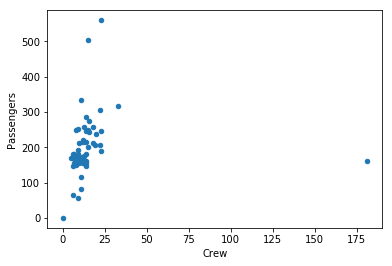

In [33]:
%matplotlib inline 
# notebook majik to display plots in the notebook

data[['Crew','Passengers']].plot(x= 'Crew',y= 'Passengers',kind= 'scatter')

#### And there's the extreme outlier
#### Are there any others?

In [34]:
# so how to put a number to an outlier?
data['Crew'].max() # works, now that they are numbers

181

In [35]:
data[data['Crew']==data['Crew'].max()]

,split,Casualties,Circumstances,Country,Crew,Date,Ground,Latitude,Location,Longitude,Notes,Passengers,Phase,Reason,Total Dead,Type
extract,extract1,,,,,,,,,,,,,,,
Avianca Flight 011,Boeing 747-283B,Extremely High,Bad Visibility by Night,Spain,181,1983-11-27,0,40.416775,Madrid - Spain,-3.70379,Some survivors,162,APR,Accident,181,COM


## Plotting non-numeric data

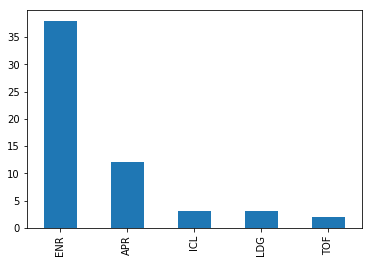

In [36]:
data['Phase'].value_counts().plot(kind='bar')
# you can guess some of these codes
# ENR = en route?
# APR = Aproach
# Takeoff, Landing
# ICL?

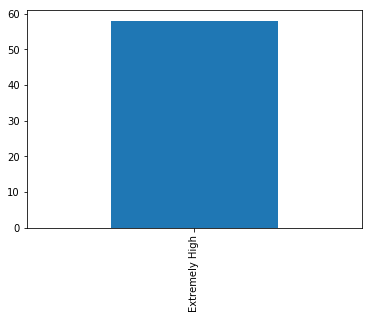

In [37]:
# not much point in plotting Casualties... so what the hey
data['Casualties'].value_counts().plot(kind='bar')

# To do: find any other data problems (there are about 10)

<br>

![](http://media1.popsugar-assets.com/files/thumbor/yjoSwHRBZ4MpTO3TN6lvI_gsKMI/fit-in/2048xorig/filters:format_auto-!!-:strip_icc-!!-/2016/03/02/901/n/1922283/01f64bd801c06153_game4/i/When-Everyone-Trying-Talk-You-Youre-Too-Hungry-Care.gif)

#### Post your suspected bad data cases in Moodle discussion forums, how you found it, and suggested fixes
(one or two each, share the load)


In [38]:
# go crazy

#### Can data be 'typed' as it is read in? 
(yes see 'dtype')
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
#### What happens if this process encounters bad data?

#### So why is 'Crew' max '9' above?

#### When a plane hits another plane is that one record or two?

#### Can DataWrangler do this sort of wrangling? 

